In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = '../results/sampling_searching_kdn'
path_no = '../results/sampling_no_searching_kdn'
exps = sorted([exp[:-5] for exp in os.listdir(path)])

In [4]:
summary = pd.DataFrame(columns = ['dataset', 'model', 'sample', 'threshold', 'test score global', 'best test score','performance gap'])
df_best_score = pd.DataFrame(columns = ['dataset', 'model', 'best score'])
i = 0
for exp in exps:
    
    with open(f'{path}/{exp}.json', 'r') as fin:
        exp_summary = json.load(fin)
    with open(f'{path_no}/{exp}.json', 'r') as fin:
        exp_summary_no = json.load(fin)
    with open(f'../results/instance_selection/{exp}.json', 'r') as fin:
        best_score = json.load(fin)
        
    for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
        summary.loc[i, 'model'] = model
        summary.loc[i, 'dataset'] = exp
        
        if model == 'GradientBoostingClassifier':
            
            summary.loc[i, 'best test score'] = exp_summary_no[model]['test_score']
            summary.loc[i, 'threshold'] = exp_summary_no[model]['threshold']
            summary.loc[i, 'sample'] = exp_summary_no[model]['sample_proportion']
            
        else:
            
            best_arg = np.argmax(np.array([exp_summary_no[model]['best_score'], exp_summary[model]['best_score']]))
            summary.loc[i, 'best test score'] = [exp_summary_no[model]['test_score'], exp_summary[model]['test_score']][best_arg]
            summary.loc[i, 'threshold'] = [exp_summary_no[model]['threshold'], exp_summary[model]['threshold']][best_arg]
            summary.loc[i, 'sample'] = [exp_summary_no[model]['sample_proportion'], exp_summary[model]['sample_proportion']][best_arg]
        
        if abs(best_score[model]['cv_score'][0]-1) < 10e-4:
            summary.loc[i, 'best test score'] = best_score[model]['test_score']
            summary.loc[i, 'threshold'] = 1
            summary.loc[i, 'sample'] = 1
            
        summary.loc[i, 'test score global'] = best_score[model]['test_score']
        summary.loc[i, 'complexity class difference'] = abs(exp_summary[exp]['info']['complexity']['class 0'][0] - exp_summary[exp]['info']['complexity']['class 1'][0])
        i += 1
summary.loc[:, 'performance gap'] = summary['test score global']-summary['best test score']

In [5]:
summary

,dataset,model,sample,threshold,test score global,best test score,performance gap,complexity class difference
0,a9a,SVC,0.75,0.4,0.785729,0.79415,-0.008421,0.271056
1,a9a,KNeighborsClassifier,0.75,0.4,0.764211,0.76967,-0.005459,0.271056
2,a9a,RandomForestClassifier,0.56,0.2,0.765829,0.779607,-0.013779,0.271056
3,a9a,GradientBoostingClassifier,0.75,0.4,0.788514,0.798161,-0.009647,0.271056
4,appendicitis,SVC,0.92,0.8,0.5,0.83541,-0.33541,0.324320
...,...,...,...,...,...,...,...,...
143,w7a,GradientBoostingClassifier,0.11,0.4,0.871733,0.840214,0.031519,0.306783
144,w8a,SVC,0.12,0.8,0.907425,0.899939,0.007486,0.284726
145,w8a,KNeighborsClassifier,0.11,0.6,0.885566,0.80838,0.077186,0.284726
146,w8a,RandomForestClassifier,0.12,0.8,0.909964,0.876471,0.033493,0.284726


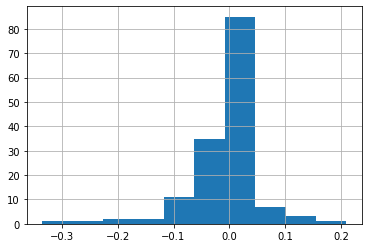

In [6]:
summary['performance gap'].hist(bins=10);

In [7]:
summary['performance gap'].astype(float).describe(percentiles=[i*0.1 for i in range(10)])

count    148.000000
mean      -0.008161
std        0.061782
min       -0.335410
0%        -0.335410
10%       -0.077528
20%       -0.034034
30%       -0.013903
40%       -0.001974
50%        0.000000
60%        0.001642
70%        0.009822
80%        0.020976
90%        0.038311
max        0.209609
Name: performance gap, dtype: float64

In [8]:
summary['sample'].astype(float).describe(percentiles=[i*0.1 for i in range(1, 10)])

count    148.000000
mean       0.617162
std        0.319594
min        0.080000
10%        0.130000
20%        0.170000
30%        0.483000
40%        0.608000
50%        0.650000
60%        0.780000
70%        0.860000
80%        0.936000
90%        0.990000
max        1.000000
Name: sample, dtype: float64

In [9]:
summary['threshold'].astype(float).describe(percentiles=[i*0.1 for i in range(1, 10)])

count    148.000000
mean       0.516216
std        0.251270
min        0.200000
10%        0.200000
20%        0.200000
30%        0.400000
40%        0.400000
50%        0.600000
60%        0.600000
70%        0.600000
80%        0.800000
90%        0.800000
max        1.000000
Name: threshold, dtype: float64

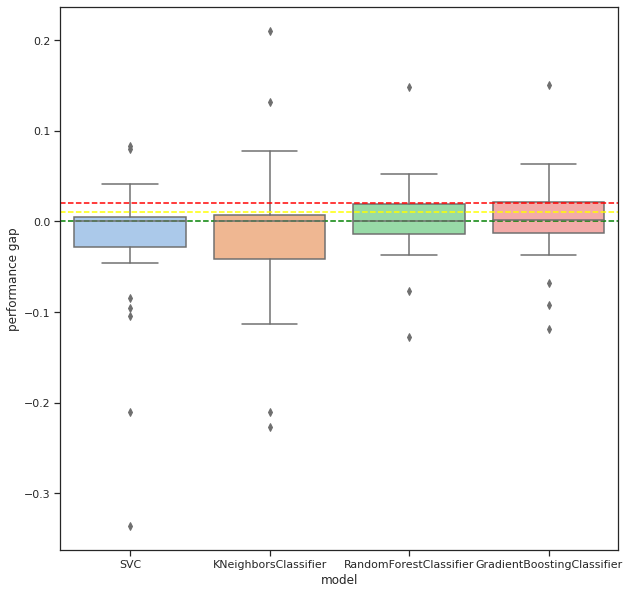

In [10]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=summary, x="model", y='performance gap')
plt.axhline(0, ls='--', c='green')
plt.axhline(0.01, ls='--', c='yellow')
# plt.axhline(0.01, ls='--', c='orange')
plt.axhline(0.02, ls='--', c='red')
plt.show()

In [11]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['performance gap'].astype(float).describe(percentiles=[i*0.1 for i in range(10)]), '\n')

SVC
count    37.000000
mean     -0.019812
std       0.073654
min      -0.335410
0%       -0.335410
10%      -0.088499
20%      -0.036268
30%      -0.016263
40%      -0.003365
50%       0.000000
60%       0.000000
70%       0.004369
80%       0.012589
90%       0.028324
max       0.083624
Name: performance gap, dtype: float64 

KNeighborsClassifier
count    37.000000
mean     -0.018692
std       0.077228
min      -0.227019
0%       -0.227019
10%      -0.109383
20%      -0.046675
30%      -0.036797
40%      -0.013764
50%       0.000000
60%       0.000000
70%       0.004418
80%       0.011909
90%       0.024698
max       0.209609
Name: performance gap, dtype: float64 

RandomForestClassifier
count    37.000000
mean      0.002249
std       0.040977
min      -0.127460
0%       -0.127460
10%      -0.030840
20%      -0.018964
30%      -0.004466
40%       0.000000
50%       0.000000
60%       0.002885
70%       0.013392
80%       0.021485
90%       0.037777
max       0.148165
Name: performance